<a href="https://colab.research.google.com/github/Temerius/ML/blob/main/course1_2_binaryclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from tqdm import tqdm

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
n_samples = 1000

In [ ]:
X, y = make_circles(n_samples = n_samples, noise = 0.04, random_state= 6)

In [ ]:
X1 = X[:,0]
X2 = X[:,1]

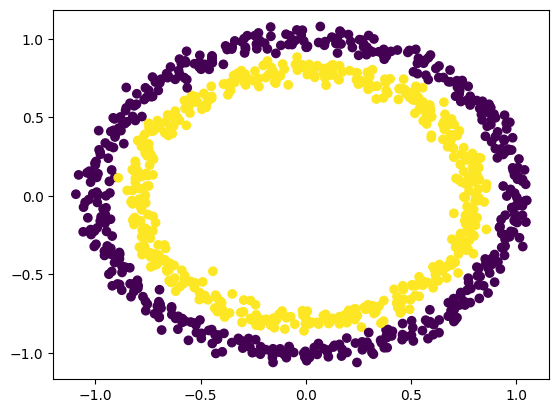

In [ ]:
plt.scatter(X1,X2, c = y)

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6)

In [ ]:
def visualize(x_train = X_train.cpu().numpy(), x_test = X_test.cpu().numpy(), y_train = y_train.cpu().numpy(), y_test = y_test.cpu().numpy(), prediction = None):
    plt.figure(figsize = (24,6))
    plt.subplot(1,3,1)
    plt.scatter(x_train[:,0],x_train[:,1], c=y_train, label = 'Train')
    plt.subplot(1,3,2)
    plt.scatter(x_test[:,0],x_test[:,1], c=y_test, label = 'Test',)

    if prediction != None:
        plt.subplot(1,3,3)
        plt.scatter(x_test[:,0],x_test[:,1], c=prediction, label = 'Prediction')
    plt.legend()

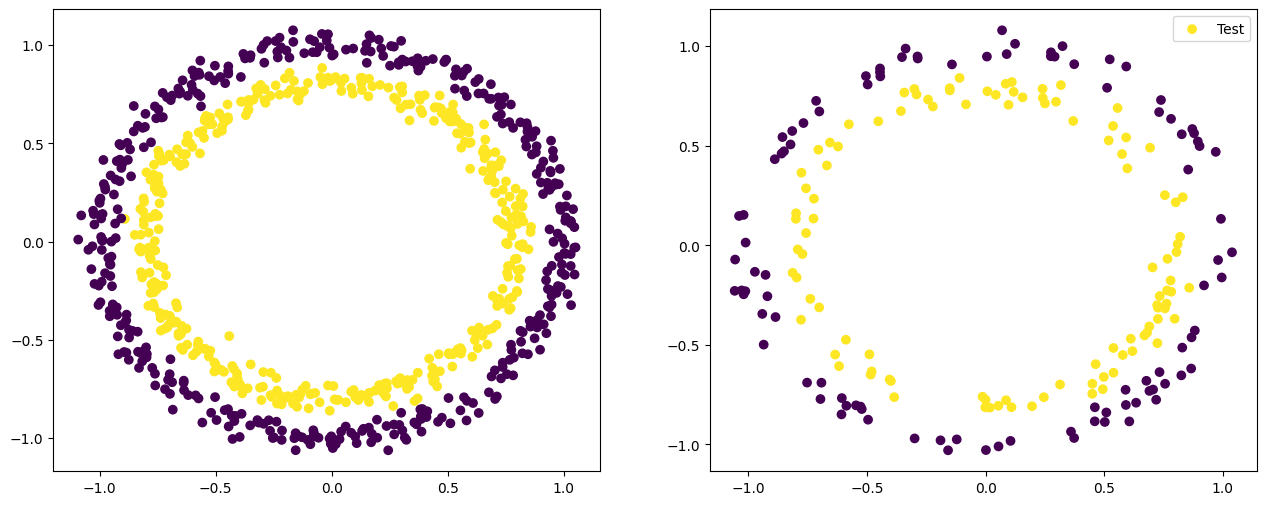

In [ ]:
visualize()

In [ ]:
def fn_accuracy(true_labels, pred_labels):

    tmp1 = torch.eq(true_labels, pred_labels).sum()
    tmp2 = tmp1.item() / len(pred_labels)
    return tmp2 * 100

In [ ]:
class Binary_Classification(nn.Module):
    def __init__(self):
        super().__init__()

        self.lay1 = nn.Linear(in_features=2, out_features=8)

        self.act1 = nn.Tanh()

        self.lay2 = nn.Linear(in_features=8, out_features=64)

        self.act2 = nn.LeakyReLU()

        self.lay3 = nn.Linear(in_features=64, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.lay3(self.act2(self.lay2(self.act1(self.lay1(x)))))

In [ ]:
model = Binary_Classification()
#model = nn.Sequential(nn.Linear(in_features=2, out_features=5), nn.Tanh(), nn.Linear(in_features=5, out_features=1))

In [ ]:
model.to(device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

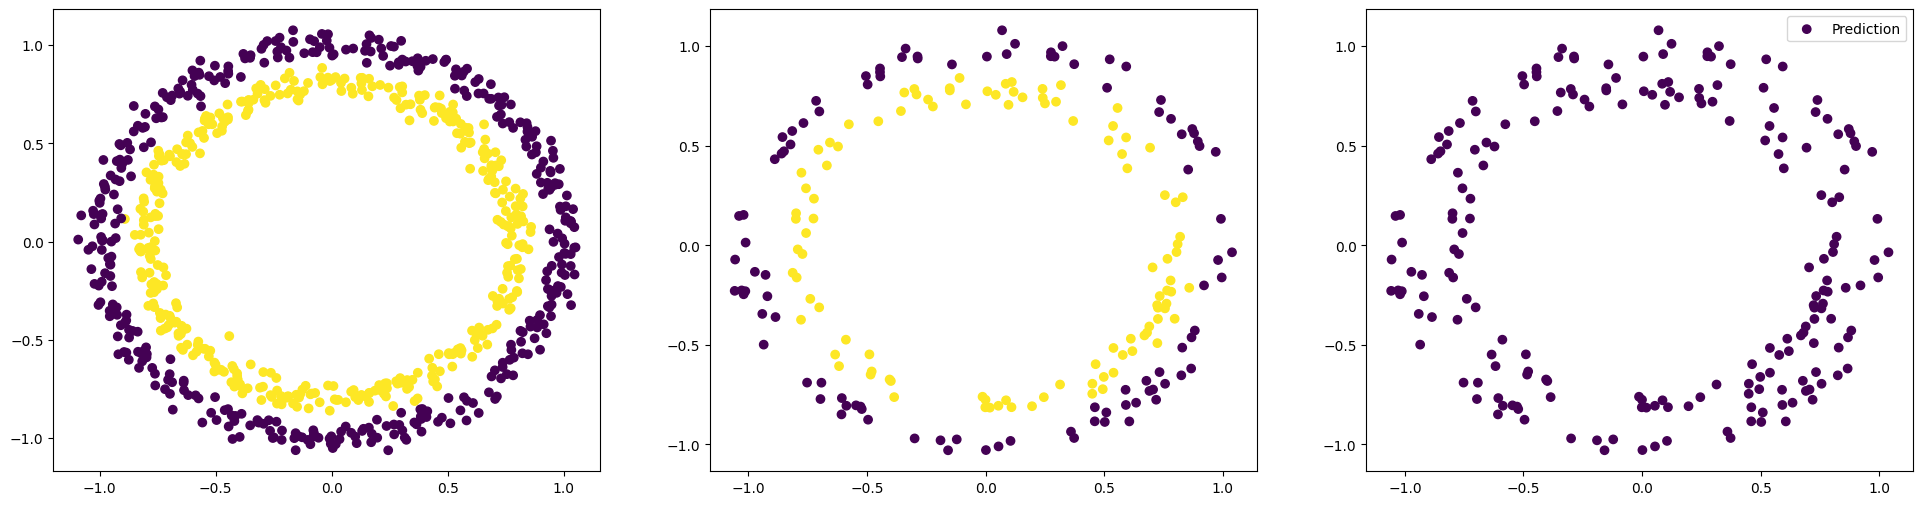

In [ ]:
model.eval()
with torch.inference_mode():
    y_pred = model(X_test).squeeze()
visualize(prediction=torch.round(torch.sigmoid(y_pred)).cpu())

In [ ]:
fn_loss = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(6)
torch.cuda.manual_seed(6)
# Training loop

epochs = 1000000
for epoch in tqdm(range(epochs)):
    model.train()

    y_pred = model(X_train)

    loss = fn_loss(y_pred.squeeze(dim=1), y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    #test part

    if epoch % 100 == 0:
        model.eval()
        with torch.inference_mode():
            test_pred = model(X_test)

        test_loss = fn_loss(test_pred.squeeze(dim=1), y_test)

        acc = fn_accuracy(y_test, torch.round(torch.sigmoid(test_pred)).squeeze())
        print(f"Epoch: {epoch}, loss: {loss:.5f}, test loss: {test_loss:.5f}, accuracy = {acc:.2f}")

        if acc == 100.00:
            print(f"train end on  epoch: {epoch}")
            break


  0%|          | 136/1000000 [00:00<24:27, 681.19it/s]

Epoch: 0, loss: 0.69665, test loss: 0.69723, accuracy = 49.00
Epoch: 100, loss: 0.69303, test loss: 0.69253, accuracy = 49.00


  0%|          | 275/1000000 [00:00<25:14, 660.03it/s]

Epoch: 200, loss: 0.69202, test loss: 0.69110, accuracy = 49.00
Epoch: 300, loss: 0.69156, test loss: 0.69052, accuracy = 52.50


  0%|          | 487/1000000 [00:00<23:59, 694.11it/s]

Epoch: 400, loss: 0.69123, test loss: 0.69021, accuracy = 66.00
Epoch: 500, loss: 0.69092, test loss: 0.68998, accuracy = 67.00


  0%|          | 703/1000000 [00:01<23:31, 708.08it/s]

Epoch: 600, loss: 0.69062, test loss: 0.68978, accuracy = 71.00
Epoch: 700, loss: 0.69030, test loss: 0.68958, accuracy = 69.50


  0%|          | 923/1000000 [00:01<23:09, 719.05it/s]

Epoch: 800, loss: 0.68998, test loss: 0.68937, accuracy = 63.00
Epoch: 900, loss: 0.68967, test loss: 0.68916, accuracy = 59.50


  0%|          | 1135/1000000 [00:01<24:29, 679.76it/s]

Epoch: 1000, loss: 0.68936, test loss: 0.68895, accuracy = 59.00
Epoch: 1100, loss: 0.68905, test loss: 0.68873, accuracy = 57.00


  0%|          | 1272/1000000 [00:01<24:43, 673.28it/s]

Epoch: 1200, loss: 0.68874, test loss: 0.68850, accuracy = 56.50
Epoch: 1300, loss: 0.68842, test loss: 0.68827, accuracy = 57.00


  0%|          | 1491/1000000 [00:02<23:20, 712.82it/s]

Epoch: 1400, loss: 0.68809, test loss: 0.68802, accuracy = 57.00
Epoch: 1500, loss: 0.68776, test loss: 0.68776, accuracy = 57.00


  0%|          | 1713/1000000 [00:02<23:48, 698.70it/s]

Epoch: 1600, loss: 0.68743, test loss: 0.68750, accuracy = 58.50
Epoch: 1700, loss: 0.68708, test loss: 0.68722, accuracy = 58.00


  0%|          | 1928/1000000 [00:02<25:31, 651.81it/s]

Epoch: 1800, loss: 0.68672, test loss: 0.68693, accuracy = 58.00
Epoch: 1900, loss: 0.68636, test loss: 0.68663, accuracy = 60.00


  0%|          | 2058/1000000 [00:03<27:07, 613.33it/s]

Epoch: 2000, loss: 0.68599, test loss: 0.68632, accuracy = 59.00
Epoch: 2100, loss: 0.68561, test loss: 0.68600, accuracy = 59.00


  0%|          | 2305/1000000 [00:03<28:38, 580.69it/s]

Epoch: 2200, loss: 0.68522, test loss: 0.68567, accuracy = 59.00
Epoch: 2300, loss: 0.68481, test loss: 0.68533, accuracy = 59.50


  0%|          | 2489/1000000 [00:03<27:55, 595.20it/s]

Epoch: 2400, loss: 0.68440, test loss: 0.68498, accuracy = 60.00
Epoch: 2500, loss: 0.68397, test loss: 0.68462, accuracy = 60.50


  0%|          | 2667/1000000 [00:04<28:43, 578.76it/s]

Epoch: 2600, loss: 0.68353, test loss: 0.68425, accuracy = 60.50
Epoch: 2700, loss: 0.68308, test loss: 0.68386, accuracy = 60.50


  0%|          | 2896/1000000 [00:04<31:00, 535.85it/s]

Epoch: 2800, loss: 0.68261, test loss: 0.68345, accuracy = 61.00
Epoch: 2900, loss: 0.68213, test loss: 0.68303, accuracy = 61.00


  0%|          | 3079/1000000 [00:04<27:59, 593.66it/s]

Epoch: 3000, loss: 0.68164, test loss: 0.68259, accuracy = 61.00
Epoch: 3100, loss: 0.68113, test loss: 0.68214, accuracy = 61.00


  0%|          | 3294/1000000 [00:05<24:29, 678.16it/s]

Epoch: 3200, loss: 0.68060, test loss: 0.68167, accuracy = 61.00
Epoch: 3300, loss: 0.68006, test loss: 0.68118, accuracy = 61.50


  0%|          | 3507/1000000 [00:05<23:43, 699.84it/s]

Epoch: 3400, loss: 0.67951, test loss: 0.68067, accuracy = 61.50
Epoch: 3500, loss: 0.67894, test loss: 0.68014, accuracy = 61.50


  0%|          | 3717/1000000 [00:05<24:47, 669.82it/s]

Epoch: 3600, loss: 0.67835, test loss: 0.67959, accuracy = 62.00
Epoch: 3700, loss: 0.67774, test loss: 0.67902, accuracy = 62.50


  0%|          | 3927/1000000 [00:06<24:05, 689.32it/s]

Epoch: 3800, loss: 0.67711, test loss: 0.67842, accuracy = 63.00
Epoch: 3900, loss: 0.67647, test loss: 0.67781, accuracy = 64.00


  0%|          | 4137/1000000 [00:06<24:11, 686.30it/s]

Epoch: 4000, loss: 0.67581, test loss: 0.67718, accuracy = 65.00
Epoch: 4100, loss: 0.67512, test loss: 0.67652, accuracy = 65.50


  0%|          | 4277/1000000 [00:06<24:02, 690.20it/s]

Epoch: 4200, loss: 0.67440, test loss: 0.67584, accuracy = 65.50
Epoch: 4300, loss: 0.67366, test loss: 0.67514, accuracy = 66.00


  0%|          | 4495/1000000 [00:06<23:32, 704.79it/s]

Epoch: 4400, loss: 0.67289, test loss: 0.67440, accuracy = 66.00
Epoch: 4500, loss: 0.67207, test loss: 0.67362, accuracy = 66.50


  0%|          | 4708/1000000 [00:07<23:45, 698.25it/s]

Epoch: 4600, loss: 0.67119, test loss: 0.67279, accuracy = 67.00
Epoch: 4700, loss: 0.67028, test loss: 0.67194, accuracy = 67.00


  0%|          | 4921/1000000 [00:07<23:57, 692.43it/s]

Epoch: 4800, loss: 0.66937, test loss: 0.67108, accuracy = 68.00
Epoch: 4900, loss: 0.66844, test loss: 0.67019, accuracy = 69.00


  1%|          | 5130/1000000 [00:07<24:26, 678.41it/s]

Epoch: 5000, loss: 0.66748, test loss: 0.66926, accuracy = 69.50
Epoch: 5100, loss: 0.66649, test loss: 0.66832, accuracy = 70.00


  1%|          | 5343/1000000 [00:08<23:45, 697.75it/s]

Epoch: 5200, loss: 0.66547, test loss: 0.66734, accuracy = 70.50
Epoch: 5300, loss: 0.66441, test loss: 0.66631, accuracy = 71.00


  1%|          | 5490/1000000 [00:08<23:07, 716.65it/s]

Epoch: 5400, loss: 0.66332, test loss: 0.66524, accuracy = 71.50
Epoch: 5500, loss: 0.66218, test loss: 0.66412, accuracy = 71.50


  1%|          | 5707/1000000 [00:08<23:25, 707.65it/s]

Epoch: 5600, loss: 0.66100, test loss: 0.66297, accuracy = 72.00
Epoch: 5700, loss: 0.65978, test loss: 0.66178, accuracy = 72.50


  1%|          | 5925/1000000 [00:08<23:20, 709.58it/s]

Epoch: 5800, loss: 0.65851, test loss: 0.66052, accuracy = 72.50
Epoch: 5900, loss: 0.65720, test loss: 0.65921, accuracy = 73.50


  1%|          | 6145/1000000 [00:09<22:51, 724.53it/s]

Epoch: 6000, loss: 0.65583, test loss: 0.65785, accuracy = 73.50
Epoch: 6100, loss: 0.65441, test loss: 0.65645, accuracy = 73.50


  1%|          | 6291/1000000 [00:09<22:53, 723.35it/s]

Epoch: 6200, loss: 0.65293, test loss: 0.65498, accuracy = 74.00
Epoch: 6300, loss: 0.65140, test loss: 0.65346, accuracy = 75.00


  1%|          | 6512/1000000 [00:09<23:12, 713.33it/s]

Epoch: 6400, loss: 0.64979, test loss: 0.65188, accuracy = 75.50
Epoch: 6500, loss: 0.64812, test loss: 0.65021, accuracy = 76.50


  1%|          | 6730/1000000 [00:10<22:57, 720.94it/s]

Epoch: 6600, loss: 0.64638, test loss: 0.64845, accuracy = 78.00
Epoch: 6700, loss: 0.64457, test loss: 0.64662, accuracy = 79.50


  1%|          | 6878/1000000 [00:10<22:47, 726.10it/s]

Epoch: 6800, loss: 0.64267, test loss: 0.64472, accuracy = 79.50
Epoch: 6900, loss: 0.64069, test loss: 0.64276, accuracy = 80.00


  1%|          | 7102/1000000 [00:10<22:35, 732.57it/s]

Epoch: 7000, loss: 0.63863, test loss: 0.64071, accuracy = 80.50
Epoch: 7100, loss: 0.63647, test loss: 0.63854, accuracy = 81.50


  1%|          | 7323/1000000 [00:10<22:59, 719.55it/s]

Epoch: 7200, loss: 0.63422, test loss: 0.63628, accuracy = 82.50
Epoch: 7300, loss: 0.63185, test loss: 0.63388, accuracy = 84.00


  1%|          | 7545/1000000 [00:11<22:37, 730.99it/s]

Epoch: 7400, loss: 0.62938, test loss: 0.63136, accuracy = 85.00
Epoch: 7500, loss: 0.62678, test loss: 0.62870, accuracy = 87.00


  1%|          | 7693/1000000 [00:11<22:44, 727.37it/s]

Epoch: 7600, loss: 0.62406, test loss: 0.62596, accuracy = 86.50
Epoch: 7700, loss: 0.62123, test loss: 0.62313, accuracy = 87.00


  1%|          | 7913/1000000 [00:11<22:50, 724.11it/s]

Epoch: 7800, loss: 0.61826, test loss: 0.62017, accuracy = 87.00
Epoch: 7900, loss: 0.61516, test loss: 0.61705, accuracy = 87.50


  1%|          | 8134/1000000 [00:11<22:58, 719.29it/s]

Epoch: 8000, loss: 0.61191, test loss: 0.61378, accuracy = 89.00
Epoch: 8100, loss: 0.60849, test loss: 0.61033, accuracy = 89.00


  1%|          | 8282/1000000 [00:12<22:48, 724.94it/s]

Epoch: 8200, loss: 0.60492, test loss: 0.60675, accuracy = 88.50
Epoch: 8300, loss: 0.60119, test loss: 0.60304, accuracy = 88.50


  1%|          | 8501/1000000 [00:12<22:57, 719.57it/s]

Epoch: 8400, loss: 0.59729, test loss: 0.59914, accuracy = 90.00
Epoch: 8500, loss: 0.59322, test loss: 0.59510, accuracy = 90.00


  1%|          | 8720/1000000 [00:12<23:37, 699.27it/s]

Epoch: 8600, loss: 0.58896, test loss: 0.59090, accuracy = 91.00
Epoch: 8700, loss: 0.58451, test loss: 0.58651, accuracy = 91.00


  1%|          | 8935/1000000 [00:13<23:44, 695.56it/s]

Epoch: 8800, loss: 0.57987, test loss: 0.58192, accuracy = 91.50
Epoch: 8900, loss: 0.57501, test loss: 0.57710, accuracy = 92.00


  1%|          | 9081/1000000 [00:13<23:14, 710.63it/s]

Epoch: 9000, loss: 0.56994, test loss: 0.57207, accuracy = 93.50
Epoch: 9100, loss: 0.56466, test loss: 0.56682, accuracy = 93.50


  1%|          | 9300/1000000 [00:13<22:56, 719.57it/s]

Epoch: 9200, loss: 0.55916, test loss: 0.56137, accuracy = 93.50
Epoch: 9300, loss: 0.55344, test loss: 0.55567, accuracy = 93.50


  1%|          | 9517/1000000 [00:13<23:25, 704.86it/s]

Epoch: 9400, loss: 0.54748, test loss: 0.54974, accuracy = 93.50
Epoch: 9500, loss: 0.54130, test loss: 0.54355, accuracy = 94.00


  1%|          | 9735/1000000 [00:14<23:06, 714.16it/s]

Epoch: 9600, loss: 0.53486, test loss: 0.53714, accuracy = 94.00
Epoch: 9700, loss: 0.52820, test loss: 0.53054, accuracy = 94.50


  1%|          | 9879/1000000 [00:14<23:03, 715.45it/s]

Epoch: 9800, loss: 0.52129, test loss: 0.52373, accuracy = 94.50
Epoch: 9900, loss: 0.51414, test loss: 0.51670, accuracy = 95.00


  1%|          | 10095/1000000 [00:14<23:08, 713.11it/s]

Epoch: 10000, loss: 0.50675, test loss: 0.50943, accuracy = 95.00
Epoch: 10100, loss: 0.49914, test loss: 0.50188, accuracy = 95.00


  1%|          | 10295/1000000 [00:15<27:12, 606.16it/s]

Epoch: 10200, loss: 0.49128, test loss: 0.49414, accuracy = 95.00
Epoch: 10300, loss: 0.48323, test loss: 0.48621, accuracy = 95.00


  1%|          | 10477/1000000 [00:15<27:58, 589.39it/s]

Epoch: 10400, loss: 0.47494, test loss: 0.47805, accuracy = 95.00
Epoch: 10500, loss: 0.46647, test loss: 0.46972, accuracy = 95.50


  1%|          | 10720/1000000 [00:15<27:55, 590.34it/s]

Epoch: 10600, loss: 0.45783, test loss: 0.46127, accuracy = 95.50
Epoch: 10700, loss: 0.44903, test loss: 0.45272, accuracy = 95.50


  1%|          | 10895/1000000 [00:16<30:56, 532.66it/s]

Epoch: 10800, loss: 0.44010, test loss: 0.44405, accuracy = 96.00
Epoch: 10900, loss: 0.43106, test loss: 0.43521, accuracy = 96.00


  1%|          | 11058/1000000 [00:16<31:15, 527.31it/s]

Epoch: 11000, loss: 0.42190, test loss: 0.42624, accuracy = 96.00
Epoch: 11100, loss: 0.41264, test loss: 0.41720, accuracy = 96.50


  1%|          | 11294/1000000 [00:16<28:11, 584.39it/s]

Epoch: 11200, loss: 0.40335, test loss: 0.40812, accuracy = 96.50
Epoch: 11300, loss: 0.39402, test loss: 0.39902, accuracy = 97.00


  1%|          | 11507/1000000 [00:17<24:39, 668.29it/s]

Epoch: 11400, loss: 0.38469, test loss: 0.38988, accuracy = 97.00
Epoch: 11500, loss: 0.37538, test loss: 0.38079, accuracy = 97.00


  1%|          | 11722/1000000 [00:17<23:42, 694.71it/s]

Epoch: 11600, loss: 0.36609, test loss: 0.37170, accuracy = 97.00
Epoch: 11700, loss: 0.35685, test loss: 0.36262, accuracy = 97.50


  1%|          | 11946/1000000 [00:17<22:37, 727.60it/s]

Epoch: 11800, loss: 0.34768, test loss: 0.35366, accuracy = 97.50
Epoch: 11900, loss: 0.33861, test loss: 0.34476, accuracy = 97.50


  1%|          | 12091/1000000 [00:18<23:36, 697.58it/s]

Epoch: 12000, loss: 0.32966, test loss: 0.33594, accuracy = 97.50
Epoch: 12100, loss: 0.32085, test loss: 0.32727, accuracy = 97.50


  1%|          | 12313/1000000 [00:18<22:47, 722.46it/s]

Epoch: 12200, loss: 0.31218, test loss: 0.31869, accuracy = 97.50
Epoch: 12300, loss: 0.30367, test loss: 0.31029, accuracy = 97.50


  1%|▏         | 12534/1000000 [00:18<22:41, 725.51it/s]

Epoch: 12400, loss: 0.29535, test loss: 0.30208, accuracy = 97.50
Epoch: 12500, loss: 0.28721, test loss: 0.29403, accuracy = 98.00


  1%|▏         | 12684/1000000 [00:18<22:24, 734.25it/s]

Epoch: 12600, loss: 0.27926, test loss: 0.28618, accuracy = 98.50
Epoch: 12700, loss: 0.27151, test loss: 0.27853, accuracy = 98.50


  1%|▏         | 12906/1000000 [00:19<22:43, 724.01it/s]

Epoch: 12800, loss: 0.26398, test loss: 0.27107, accuracy = 98.50
Epoch: 12900, loss: 0.25666, test loss: 0.26382, accuracy = 98.50


  1%|▏         | 13130/1000000 [00:19<22:44, 723.07it/s]

Epoch: 13000, loss: 0.24956, test loss: 0.25677, accuracy = 98.50
Epoch: 13100, loss: 0.24269, test loss: 0.24994, accuracy = 98.50


  1%|▏         | 13278/1000000 [00:19<22:35, 728.06it/s]

Epoch: 13200, loss: 0.23604, test loss: 0.24334, accuracy = 99.00
Epoch: 13300, loss: 0.22960, test loss: 0.23693, accuracy = 99.00


  1%|▏         | 13500/1000000 [00:19<22:33, 728.98it/s]

Epoch: 13400, loss: 0.22338, test loss: 0.23073, accuracy = 99.00
Epoch: 13500, loss: 0.21736, test loss: 0.22475, accuracy = 99.00


  1%|▏         | 13723/1000000 [00:20<22:25, 732.86it/s]

Epoch: 13600, loss: 0.21156, test loss: 0.21898, accuracy = 99.00
Epoch: 13700, loss: 0.20596, test loss: 0.21341, accuracy = 99.00


  1%|▏         | 13945/1000000 [00:20<22:41, 724.35it/s]

Epoch: 13800, loss: 0.20056, test loss: 0.20803, accuracy = 99.00
Epoch: 13900, loss: 0.19537, test loss: 0.20284, accuracy = 99.00


  1%|▏         | 14095/1000000 [00:20<22:35, 727.28it/s]

Epoch: 14000, loss: 0.19036, test loss: 0.19785, accuracy = 99.00
Epoch: 14100, loss: 0.18553, test loss: 0.19302, accuracy = 99.00


  1%|▏         | 14314/1000000 [00:21<23:03, 712.24it/s]

Epoch: 14200, loss: 0.18088, test loss: 0.18838, accuracy = 99.00
Epoch: 14300, loss: 0.17641, test loss: 0.18392, accuracy = 99.00


  1%|▏         | 14537/1000000 [00:21<22:32, 728.71it/s]

Epoch: 14400, loss: 0.17210, test loss: 0.17960, accuracy = 99.00
Epoch: 14500, loss: 0.16795, test loss: 0.17544, accuracy = 99.00


  1%|▏         | 14683/1000000 [00:21<22:53, 717.41it/s]

Epoch: 14600, loss: 0.16395, test loss: 0.17143, accuracy = 99.00
Epoch: 14700, loss: 0.16011, test loss: 0.16757, accuracy = 99.00


  1%|▏         | 14904/1000000 [00:21<22:44, 721.76it/s]

Epoch: 14800, loss: 0.15640, test loss: 0.16385, accuracy = 99.00
Epoch: 14900, loss: 0.15284, test loss: 0.16031, accuracy = 99.00


  2%|▏         | 15122/1000000 [00:22<22:54, 716.43it/s]

Epoch: 15000, loss: 0.14941, test loss: 0.15690, accuracy = 99.00
Epoch: 15100, loss: 0.14609, test loss: 0.15359, accuracy = 99.00


  2%|▏         | 15339/1000000 [00:22<22:53, 717.13it/s]

Epoch: 15200, loss: 0.14291, test loss: 0.15040, accuracy = 99.00
Epoch: 15300, loss: 0.13983, test loss: 0.14732, accuracy = 99.00


  2%|▏         | 15482/1000000 [00:22<23:31, 697.74it/s]

Epoch: 15400, loss: 0.13687, test loss: 0.14435, accuracy = 99.00
Epoch: 15500, loss: 0.13402, test loss: 0.14149, accuracy = 99.00


  2%|▏         | 15702/1000000 [00:23<22:51, 717.59it/s]

Epoch: 15600, loss: 0.13126, test loss: 0.13873, accuracy = 99.00
Epoch: 15700, loss: 0.12860, test loss: 0.13607, accuracy = 99.00


  2%|▏         | 15917/1000000 [00:23<23:41, 692.46it/s]

Epoch: 15800, loss: 0.12603, test loss: 0.13349, accuracy = 99.00
Epoch: 15900, loss: 0.12356, test loss: 0.13101, accuracy = 99.00


  2%|▏         | 16129/1000000 [00:23<23:58, 683.95it/s]

Epoch: 16000, loss: 0.12116, test loss: 0.12861, accuracy = 99.00
Epoch: 16100, loss: 0.11885, test loss: 0.12630, accuracy = 99.00


  2%|▏         | 16278/1000000 [00:23<22:59, 713.32it/s]

Epoch: 16200, loss: 0.11662, test loss: 0.12406, accuracy = 99.00
Epoch: 16300, loss: 0.11446, test loss: 0.12191, accuracy = 99.00


  2%|▏         | 16496/1000000 [00:24<22:56, 714.68it/s]

Epoch: 16400, loss: 0.11238, test loss: 0.11982, accuracy = 99.00
Epoch: 16500, loss: 0.11036, test loss: 0.11781, accuracy = 99.00


  2%|▏         | 16717/1000000 [00:24<22:34, 725.93it/s]

Epoch: 16600, loss: 0.10841, test loss: 0.11585, accuracy = 99.00
Epoch: 16700, loss: 0.10652, test loss: 0.11395, accuracy = 99.00


  2%|▏         | 16935/1000000 [00:24<22:53, 715.58it/s]

Epoch: 16800, loss: 0.10468, test loss: 0.11211, accuracy = 99.00
Epoch: 16900, loss: 0.10290, test loss: 0.11032, accuracy = 99.00


  2%|▏         | 17082/1000000 [00:24<22:38, 723.52it/s]

Epoch: 17000, loss: 0.10118, test loss: 0.10859, accuracy = 99.00
Epoch: 17100, loss: 0.09950, test loss: 0.10691, accuracy = 99.00


  2%|▏         | 17301/1000000 [00:25<22:55, 714.24it/s]

Epoch: 17200, loss: 0.09788, test loss: 0.10527, accuracy = 99.00
Epoch: 17300, loss: 0.09631, test loss: 0.10368, accuracy = 99.00


  2%|▏         | 17518/1000000 [00:25<22:57, 713.22it/s]

Epoch: 17400, loss: 0.09478, test loss: 0.10214, accuracy = 99.00
Epoch: 17500, loss: 0.09329, test loss: 0.10065, accuracy = 99.00


  2%|▏         | 17737/1000000 [00:25<22:43, 720.33it/s]

Epoch: 17600, loss: 0.09184, test loss: 0.09919, accuracy = 99.00
Epoch: 17700, loss: 0.09043, test loss: 0.09778, accuracy = 99.00


  2%|▏         | 17886/1000000 [00:26<22:45, 719.23it/s]

Epoch: 17800, loss: 0.08905, test loss: 0.09641, accuracy = 99.00
Epoch: 17900, loss: 0.08773, test loss: 0.09510, accuracy = 99.50


  2%|▏         | 18101/1000000 [00:26<23:42, 690.44it/s]

Epoch: 18000, loss: 0.08644, test loss: 0.09383, accuracy = 99.50
Epoch: 18100, loss: 0.08518, test loss: 0.09259, accuracy = 99.50


  2%|▏         | 18317/1000000 [00:26<23:23, 699.21it/s]

Epoch: 18200, loss: 0.08396, test loss: 0.09138, accuracy = 99.50
Epoch: 18300, loss: 0.08277, test loss: 0.09021, accuracy = 99.50


  2%|▏         | 18453/1000000 [00:26<26:07, 626.31it/s]

Epoch: 18400, loss: 0.08162, test loss: 0.08907, accuracy = 99.50
Epoch: 18500, loss: 0.08050, test loss: 0.08795, accuracy = 99.50


  2%|▏         | 18702/1000000 [00:27<27:18, 598.95it/s]

Epoch: 18600, loss: 0.07941, test loss: 0.08687, accuracy = 99.50
Epoch: 18700, loss: 0.07835, test loss: 0.08581, accuracy = 99.50


  2%|▏         | 18886/1000000 [00:27<27:19, 598.49it/s]

Epoch: 18800, loss: 0.07731, test loss: 0.08478, accuracy = 99.50
Epoch: 18900, loss: 0.07630, test loss: 0.08377, accuracy = 99.50


  2%|▏         | 19069/1000000 [00:28<28:15, 578.52it/s]

Epoch: 19000, loss: 0.07532, test loss: 0.08280, accuracy = 99.50
Epoch: 19100, loss: 0.07437, test loss: 0.08185, accuracy = 99.50


  2%|▏         | 19296/1000000 [00:28<30:01, 544.40it/s]

Epoch: 19200, loss: 0.07344, test loss: 0.08093, accuracy = 99.50
Epoch: 19300, loss: 0.07253, test loss: 0.08003, accuracy = 99.50


  2%|▏         | 19465/1000000 [00:28<29:33, 552.91it/s]

Epoch: 19400, loss: 0.07164, test loss: 0.07915, accuracy = 99.50
Epoch: 19500, loss: 0.07077, test loss: 0.07829, accuracy = 99.50


  2%|▏         | 19688/1000000 [00:29<24:09, 676.20it/s]

Epoch: 19600, loss: 0.06992, test loss: 0.07745, accuracy = 99.50
Epoch: 19700, loss: 0.06909, test loss: 0.07663, accuracy = 99.50


  2%|▏         | 19908/1000000 [00:29<22:50, 715.12it/s]

Epoch: 19800, loss: 0.06827, test loss: 0.07583, accuracy = 99.50
Epoch: 19900, loss: 0.06748, test loss: 0.07504, accuracy = 99.50


  2%|▏         | 20128/1000000 [00:29<22:40, 720.39it/s]

Epoch: 20000, loss: 0.06671, test loss: 0.07429, accuracy = 99.50
Epoch: 20100, loss: 0.06595, test loss: 0.07354, accuracy = 99.50


  2%|▏         | 20277/1000000 [00:29<22:30, 725.64it/s]

Epoch: 20200, loss: 0.06521, test loss: 0.07281, accuracy = 99.50
Epoch: 20300, loss: 0.06449, test loss: 0.07210, accuracy = 99.50


  2%|▏         | 20497/1000000 [00:30<22:40, 719.86it/s]

Epoch: 20400, loss: 0.06378, test loss: 0.07140, accuracy = 99.50
Epoch: 20500, loss: 0.06309, test loss: 0.07071, accuracy = 99.50


  2%|▏         | 20719/1000000 [00:30<22:39, 720.23it/s]

Epoch: 20600, loss: 0.06241, test loss: 0.07003, accuracy = 99.50
Epoch: 20700, loss: 0.06175, test loss: 0.06938, accuracy = 99.50


  2%|▏         | 20938/1000000 [00:30<22:42, 718.70it/s]

Epoch: 20800, loss: 0.06110, test loss: 0.06874, accuracy = 99.50
Epoch: 20900, loss: 0.06046, test loss: 0.06811, accuracy = 99.50


  2%|▏         | 21083/1000000 [00:30<22:42, 718.28it/s]

Epoch: 21000, loss: 0.05984, test loss: 0.06749, accuracy = 99.50
Epoch: 21100, loss: 0.05923, test loss: 0.06689, accuracy = 99.50


  2%|▏         | 21299/1000000 [00:31<22:58, 709.98it/s]

Epoch: 21200, loss: 0.05863, test loss: 0.06629, accuracy = 99.50
Epoch: 21300, loss: 0.05804, test loss: 0.06572, accuracy = 99.50


  2%|▏         | 21515/1000000 [00:31<22:59, 709.26it/s]

Epoch: 21400, loss: 0.05747, test loss: 0.06515, accuracy = 99.50
Epoch: 21500, loss: 0.05691, test loss: 0.06459, accuracy = 99.50


  2%|▏         | 21732/1000000 [00:31<22:56, 710.55it/s]

Epoch: 21600, loss: 0.05636, test loss: 0.06404, accuracy = 99.50
Epoch: 21700, loss: 0.05582, test loss: 0.06350, accuracy = 99.50


  2%|▏         | 21879/1000000 [00:32<22:37, 720.47it/s]

Epoch: 21800, loss: 0.05529, test loss: 0.06297, accuracy = 99.50
Epoch: 21900, loss: 0.05477, test loss: 0.06243, accuracy = 99.50


  2%|▏         | 22098/1000000 [00:32<22:49, 713.94it/s]

Epoch: 22000, loss: 0.05426, test loss: 0.06192, accuracy = 99.50
Epoch: 22100, loss: 0.05376, test loss: 0.06141, accuracy = 99.50


  2%|▏         | 22314/1000000 [00:32<22:55, 710.66it/s]

Epoch: 22200, loss: 0.05327, test loss: 0.06092, accuracy = 99.50
Epoch: 22300, loss: 0.05279, test loss: 0.06043, accuracy = 99.50


  2%|▏         | 22530/1000000 [00:33<22:48, 714.35it/s]

Epoch: 22400, loss: 0.05232, test loss: 0.05996, accuracy = 99.50
Epoch: 22500, loss: 0.05186, test loss: 0.05949, accuracy = 99.50


  2%|▏         | 22677/1000000 [00:33<22:41, 717.56it/s]

Epoch: 22600, loss: 0.05141, test loss: 0.05903, accuracy = 99.50
Epoch: 22700, loss: 0.05096, test loss: 0.05858, accuracy = 99.50


  2%|▏         | 22892/1000000 [00:33<23:04, 705.60it/s]

Epoch: 22800, loss: 0.05052, test loss: 0.05814, accuracy = 99.50
Epoch: 22900, loss: 0.05009, test loss: 0.05771, accuracy = 99.50


  2%|▏         | 23106/1000000 [00:33<23:05, 705.18it/s]

Epoch: 23000, loss: 0.04967, test loss: 0.05728, accuracy = 99.50
Epoch: 23100, loss: 0.04925, test loss: 0.05687, accuracy = 99.50


  2%|▏         | 23321/1000000 [00:34<23:11, 701.92it/s]

Epoch: 23200, loss: 0.04884, test loss: 0.05646, accuracy = 99.50
Epoch: 23300, loss: 0.04844, test loss: 0.05606, accuracy = 99.50


  2%|▏         | 23538/1000000 [00:34<23:29, 692.76it/s]

Epoch: 23400, loss: 0.04804, test loss: 0.05566, accuracy = 99.50
Epoch: 23500, loss: 0.04765, test loss: 0.05527, accuracy = 99.50


  2%|▏         | 23600/1000000 [00:34<23:49, 683.05it/s]

Epoch: 23600, loss: 0.04727, test loss: 0.05488, accuracy = 100.00
train end on  epoch: 23600


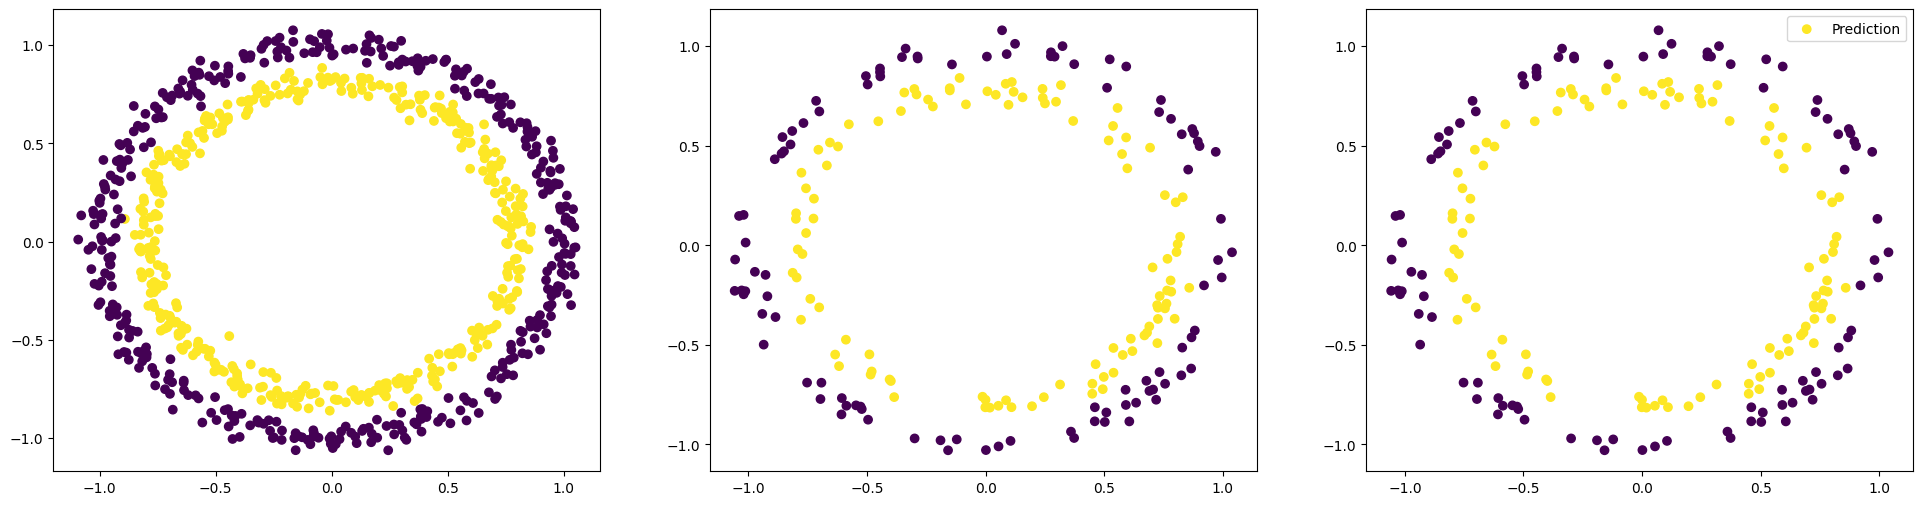

In [ ]:
model.eval()
with torch.inference_mode():
    y_pred = model(X_test).squeeze()
visualize(prediction=torch.round(torch.sigmoid(y_pred)).cpu())

In [ ]:
d = {
    'Tanh': 11130,
    'ReLU': 18580,
    'LeakyReLU': 15000
}